In [1]:
import os

# Change this to the folder where your project lives
os.chdir(r"C:\Users\PC\Desktop\DS projects\flu-shot-learning")

print("Current working directory:", os.getcwd())

Current working directory: C:\Users\PC\Desktop\DS projects\flu-shot-learning


In [2]:
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '1'  

In [3]:
#   Imports 
# Import required libraries for modeling, metrics, and imbalance handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, make_scorer, ConfusionMatrixDisplay

# To handle class imbalance
from imblearn.over_sampling import SMOTE


In [4]:
# Load the dataset
df = pd.read_csv("data/processed_data.csv")
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,concern_knowledge_log,household_size,household_size_capped,behavioral_score_binned_medium,behavioral_score_binned_high,behavioral_score_binned_very_high,concern_knowledge_tier_medium,concern_knowledge_tier_high,household_size_group_small_family,household_size_group_large_family
0,-0.681849,-2.044279,-0.226293,-1.634957,-0.272097,-2.177944,-0.74589,1.404892,0.687870,-0.503893,...,0.872919,-1.755850,-1.755850,0,0,0,0,0,0,0
1,1.518373,1.197027,-0.226293,0.611637,-0.272097,0.459149,-0.74589,1.404892,0.687870,-0.503893,...,1.035862,-1.755850,-1.755850,1,0,0,0,0,0,0
2,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,-2.177944,-0.74589,-0.711798,-1.453764,-0.503893,...,0.253749,0.910936,0.910936,0,0,0,0,0,0,0
3,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,-1.453764,-0.503893,...,0.253749,-1.755850,-1.755850,0,0,0,0,0,0,0
4,0.418262,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,0.687870,-0.503893,...,0.000000,-0.422457,-0.422457,1,0,0,0,0,0,0


In [5]:
# Define features and targets
# Already done scaling on X features during data preprocessing
X = df.drop(["h1n1_vaccine", "seasonal_vaccine"], axis=1)
y_h1n1 = df["h1n1_vaccine"]
y_seasonal = df["seasonal_vaccine"]


In [6]:
# Split for H1N1
# Split the dataset into training and test sets
# i use stratify=y to preserve class balance in both sets
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(
    X, y_h1n1, test_size=0.2, stratify=y_h1n1, random_state=42)

In [7]:
# Split for Seasonal
# Split the dataset into training and test sets
#  used stratify=y to preserve class balance in both sets
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(
    X, y_seasonal, test_size=0.2, stratify=y_seasonal, random_state=42
)

In [8]:
X_test_h1n1

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,concern_knowledge_log,household_size,household_size_capped,behavioral_score_binned_medium,behavioral_score_binned_high,behavioral_score_binned_very_high,concern_knowledge_tier_medium,concern_knowledge_tier_high,household_size_group_small_family,household_size_group_large_family
23200,1.518373,-0.423626,4.419056,0.611637,3.675158,0.459149,1.34068,1.404892,0.687870,1.984546,...,0.000000,2.819923,2.819923,0,0,1,0,0,1,0
1928,0.418262,1.197027,-0.226293,0.611637,3.675158,0.459149,-0.74589,-0.711798,-1.453764,1.984546,...,0.405912,-0.422457,-0.422457,1,0,0,0,0,0,0
24951,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,-2.177944,-0.74589,-0.711798,0.687870,-0.503893,...,0.253749,-1.755850,-1.755850,0,0,0,0,0,0,0
20228,0.418262,1.197027,-0.226293,0.611637,-0.272097,0.459149,-0.74589,-0.711798,0.687870,1.984546,...,0.405912,2.819923,2.819923,0,0,0,0,0,1,0
20206,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,0.459149,-0.74589,-0.711798,-1.453764,-0.503893,...,0.253749,1.739129,1.739129,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22659,0.418262,1.197027,-0.226293,0.611637,-0.272097,0.459149,-0.74589,-0.711798,0.687870,-0.503893,...,0.405912,1.486529,1.486529,0,0,0,0,0,1,0
13383,-0.681849,-2.044279,-0.226293,0.611637,-0.272097,0.459149,-0.74589,-0.711798,0.687870,1.984546,...,0.872919,-0.422457,-0.422457,0,0,0,0,0,0,0
15716,0.418262,1.197027,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,0.687870,1.984546,...,0.405912,-0.422457,-0.422457,1,0,0,0,0,0,0
15531,-1.781960,1.197027,-0.226293,-1.634957,-0.272097,-2.177944,-0.74589,-0.711798,-1.453764,-0.503893,...,0.000000,0.658336,0.658336,0,0,0,0,0,0,0


# Baseline models

In [9]:

# H1N1 baseline
# Baseline = always predict majority class (most frequent label)
# This sets the minimum performance threshold we must beat

dummy_h1n1 = DummyClassifier(strategy='most_frequent')
dummy_h1n1.fit(X_train_h1n1, y_train_h1n1)
dummy_pred_h1n1 = dummy_h1n1.predict(X_test_h1n1)

print("H1N1 Dummy Results:")
print(classification_report(y_test_h1n1, dummy_pred_h1n1))



H1N1 Dummy Results:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4207
           1       0.00      0.00      0.00      1135

    accuracy                           0.79      5342
   macro avg       0.39      0.50      0.44      5342
weighted avg       0.62      0.79      0.69      5342



In [10]:
accuracy = f"{dummy_h1n1.score(X_test_h1n1, y_test_h1n1) * 100:.2f}"
print(accuracy)

78.75


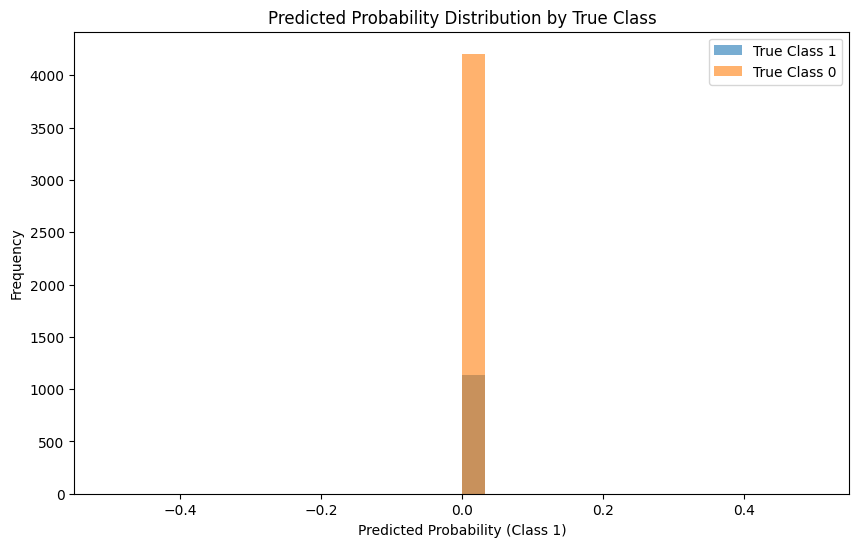

In [11]:

# Get predicted probabilities and true labels
proba = dummy_h1n1.predict_proba(X_test_h1n1)
y_true = y_test_h1n1

# Create DataFrame for easier plotting
df = pd.DataFrame({
    'prob_class_1': proba[:, 1],  # Probability of positive class
    'true_label': y_true
})

# Plot
plt.figure(figsize=(10, 6))
for class_label in df['true_label'].unique():
    subset = df[df['true_label'] == class_label]
    plt.hist(subset['prob_class_1'], bins=30, alpha=0.6, 
             label=f'True Class {class_label}')

plt.xlabel('Predicted Probability (Class 1)')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution by True Class')
plt.legend()
plt.show()

The provided output presents a classification report, the model's accuracy score, and probability predictions for a baseline H1N1 classification model. This model appears to be a naive classifier, likely predicting the majority class for all instances, as indicated by the specific metrics.
 # Classification Report Interpretation
The classification_report provides metrics for each class (0 and 1) and overall averages:
# Class 0 (Negative/No H1N1):
- Precision (0.79): When the model predicts class 0, it is correct 79% of the time.
- Recall (1.00): The model correctly identifies all instances of class 0 (100% of actual negatives are predicted as negative).
- F1-score (0.88): The harmonic mean of precision and recall for class 0, indicating a good balance for this class. 
- Support (4207): There are 4207 actual instances of class 0 in the test set.
   # Class 1 (Positive/H1N1):
- Precision (0.00): When the model predicts class 1, it is never correct. This is a strong indicator that the model never predicts class 1 or predicts it incorrectly every time. 
- Recall (0.00): The model fails to identify any actual instances of class 1 (0% of actual positives are predicted as positive). 
-F1-score (0.00): Reflects the zero precision and recall for class 1. 
- Support (1135): There are 1135 actual instances of class 1 in the test set.
 # Overall Metrics:
- Accuracy (0.79): The model correctly predicts the class for 79% of all instances in the test set. This high accuracy is misleading due to the severe class imbalance and the model's bias towards the majority class (Class 0). 
- Macro Avg (Precision 0.39, Recall 0.50, F1-score 0.44): The unweighted average of metrics for each class. These lower values highlight the poor performance on the minority class. 
- Weighted Avg (Precision 0.62, Recall 0.79, F1-score 0.69): The average of metrics weighted by the support of each class. This is higher than macro average due to the dominance of the well-performing majority class.

In [12]:
# Seasonal baseline  
dummy_seasonal = DummyClassifier(strategy='most_frequent')
dummy_seasonal.fit(X_train_seasonal, y_train_seasonal)
dummy_pred_seasonal = dummy_seasonal.predict(X_test_seasonal)

print("\nSeasonal Dummy Results:")
print(classification_report(y_test_seasonal, dummy_pred_seasonal))


Seasonal Dummy Results:
              precision    recall  f1-score   support

           0       0.53      1.00      0.70      2855
           1       0.00      0.00      0.00      2487

    accuracy                           0.53      5342
   macro avg       0.27      0.50      0.35      5342
weighted avg       0.29      0.53      0.37      5342



In [13]:
accuracy = f"{dummy_seasonal.score(X_test_seasonal, y_test_seasonal) * 100:.2f}"
print(accuracy)

53.44


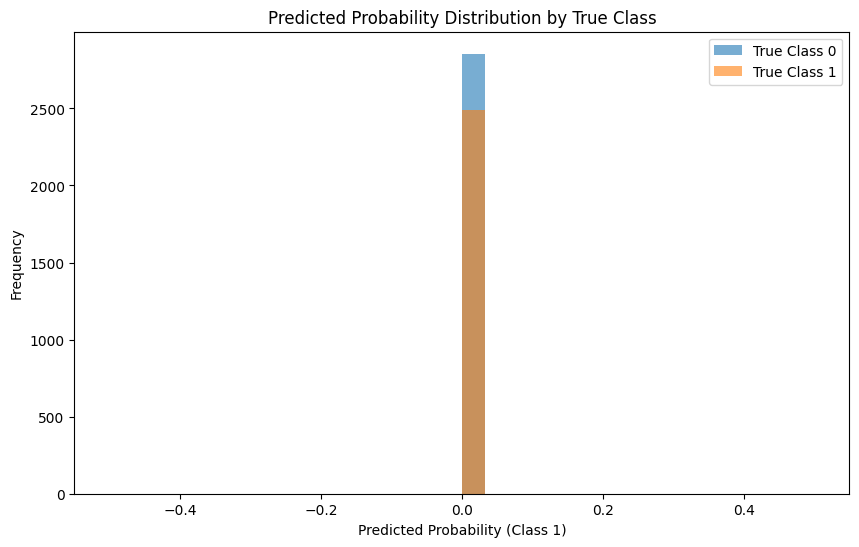

In [14]:

# Get predicted probabilities and true labels
proba2 = dummy_seasonal.predict_proba(X_test_seasonal)
y_true = y_test_seasonal

# Create DataFrame for easier plotting
df = pd.DataFrame({
    'prob_class_1': proba[:, 1],  # Probability of positive class
    'true_label': y_true
})

# Plot
plt.figure(figsize=(10, 6))
for class_label in df['true_label'].unique():
    subset = df[df['true_label'] == class_label]
    plt.hist(subset['prob_class_1'], bins=30, alpha=0.6, 
             label=f'True Class {class_label}')

plt.xlabel('Predicted Probability (Class 1)')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution by True Class')
plt.legend()
plt.show()

The Seasonal Dummy Results table shows the performance metrics for a baseline model that predicts the most frequent class in the training data.
- Precision (0.53): When the model predicts class 0, it is correct 53% of the time.
- Recall (1.00): The model correctly identifies all instances of class 0. This is expected because the 'most_frequent' strategy will always predict the majority class (class 0 in this case), thus capturing all its instances.
- f1-score (0.70): The harmonic mean of precision and recall for class 0.
- Support (2855): There are 2855 instances of class 0 in the y_test_seasonal dataset.
- Precision, Recall, f1-score, and Support for Class 1 (0.00, 0.00, 0.00, 2487):
- Precision, Recall, f1-score (0.00): The model completely fails to identify or correctly predict any instances of class 1. This is also expected as the 'most_frequent' strategy exclusively predicts the majority class (class 0) and never predicts the minority class (class 1).
- Support (2487): There are 2487 instances of class 1 in the y_test_seasonal dataset.
- Accuracy (0.53): The overall accuracy of the model is 53%. This means 53% of all predictions made by the model are correct. This accuracy is primarily driven by the correct prediction of the majority class, as the minority class is entirely missed.
- Macro Avg (0.27, 0.50, 0.35): The unweighted average of precision, recall, and f1-score across both classes. Since class 1 has 0 for all these metrics, the macro average is significantly pulled down.
- Weighted Avg (0.53, 0.53, 0.37): The average of precision, recall, and f1-score, weighted by the support of each class. This provides a more representative average given the class imbalance.

In [15]:
# Logistic Regression for H1N1
log_h1n1 = LogisticRegression(max_iter=1000, random_state=42)
log_h1n1.fit(X_train_h1n1, y_train_h1n1)
y_pred_h1n1 = log_h1n1.predict(X_test_h1n1)

print("Baseline Logistic Regression - H1N1")
print(classification_report(y_test_h1n1, y_pred_h1n1))


Baseline Logistic Regression - H1N1
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4207
           1       0.68      0.42      0.52      1135

    accuracy                           0.83      5342
   macro avg       0.77      0.68      0.71      5342
weighted avg       0.82      0.83      0.82      5342



In [16]:
accuracy = f"{log_h1n1.score(X_test_h1n1, y_test_h1n1) * 100:.2f}%"
print(accuracy)

83.49%


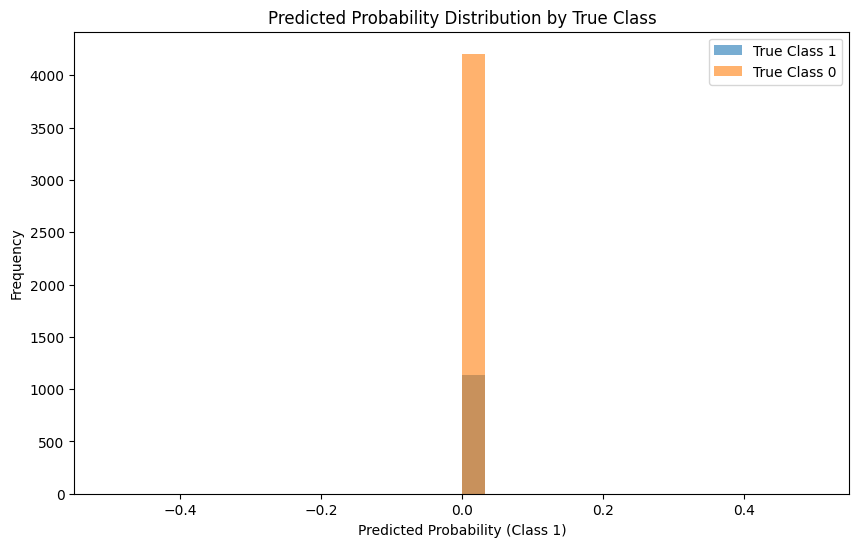

In [17]:
proba2 = log_h1n1.predict_proba(X_test_h1n1)
y_true = y_test_h1n1

# Create DataFrame for easier plotting
df = pd.DataFrame({
    'prob_class_1': proba[:, 1],  # Probability of positive class
    'true_label': y_true
})

# Plot
plt.figure(figsize=(10, 6))
for class_label in df['true_label'].unique():
    subset = df[df['true_label'] == class_label]
    plt.hist(subset['prob_class_1'], bins=30, alpha=0.6, 
             label=f'True Class {class_label}')

plt.xlabel('Predicted Probability (Class 1)')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution by True Class')
plt.legend()
plt.show()

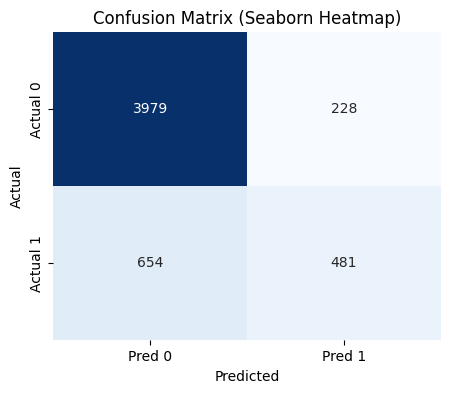

In [18]:
cm = confusion_matrix(y_test_h1n1, y_pred_h1n1)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Seaborn Heatmap)")

plt.show()


Baseline Model Interpretation - H1N1 Vaccine
Overall Performance

- Accuracy: 84% - Seems good, but misleading due to class imbalance
- The model is heavily biased toward predicting "No Vaccine" (Class 0)

Class 0 (No Vaccine) - 4,207 cases:

- Precision: 86% - When model predicts "no vaccine," it's correct 86% of time
- Recall: 95% - Catches 95% of actual non-vaccinated people
- F1-Score: 90% - Strong overall performance for majority class

Class 1 (Vaccinated) - 1,135 cases:

- Precision: 68% - When model predicts "vaccinated," it's correct 68% of time
- Recall: 42% - Only catches 42% of actual vaccinated people 
- F1-Score: 52% - Poor performance for minority class

Key Problems

- Missing Vaccinated People: The model fails to identify 58% of vaccinated individuals (low recall)
- Class Imbalance Effect: 79% of data is "no vaccine" vs 21% "vaccinated" - model learned to favor majority class
- False Negatives: High number of vaccinated people incorrectly classified as non-vaccinated

Next Steps Priority

- Address class imbalance (SMOTE)
- Feature engineering to improve signal
- Focus on improving recall for vaccinated class (Class 1)



What This Means
The model is essentially learning to predict "no vaccine" most of the time because it's usually correct due to the imbalanced dataset. This makes it nearly useless for identifying people who actually got vaccinated.

In [19]:
# Logistic Regression for Seasonal
log_seasonal = LogisticRegression(max_iter=1000, random_state=42)
log_seasonal.fit(X_train_seasonal, y_train_seasonal)
y_pred_seasonal = log_seasonal.predict(X_test_seasonal)

print("Baseline Logistic Regression - Seasonal")
print(classification_report(y_test_seasonal, y_pred_seasonal))


Baseline Logistic Regression - Seasonal
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      2855
           1       0.78      0.73      0.76      2487

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



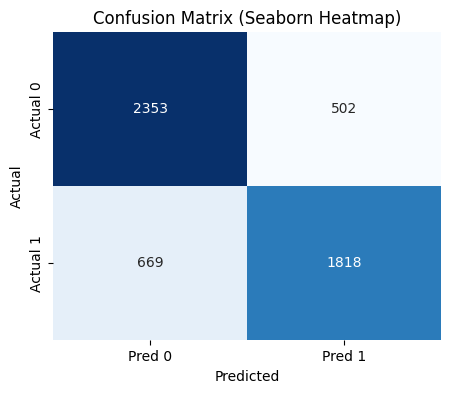

In [20]:
cm = confusion_matrix(y_test_seasonal, y_pred_seasonal)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Seaborn Heatmap)")
plt.show()

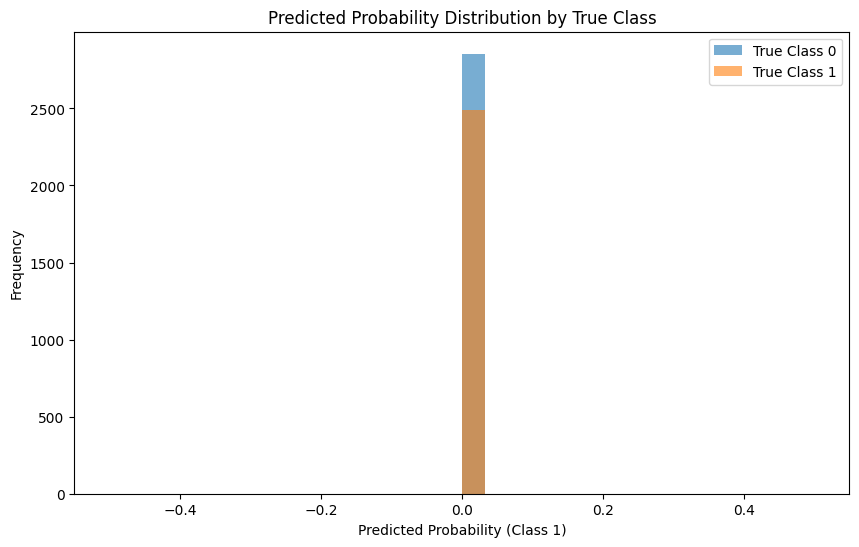

In [21]:
proba2 = log_seasonal.predict_proba(X_test_seasonal)
y_true = y_test_seasonal

# Create DataFrame for easier plotting
df = pd.DataFrame({
    'prob_class_1': proba[:, 1],  # Probability of positive class
    'true_label': y_true
})

# Plot
plt.figure(figsize=(10, 6))
for class_label in df['true_label'].unique():
    subset = df[df['true_label'] == class_label]
    plt.hist(subset['prob_class_1'], bins=30, alpha=0.6, 
             label=f'True Class {class_label}')

plt.xlabel('Predicted Probability (Class 1)')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution by True Class')
plt.legend()
plt.show()

Baseline Model Interpretation - Seasonal Vaccine
Overall Performance

- Accuracy: 78% - Moderate performance, more reliable than H1N1 due to balanced classes
- Balanced Performance: All macro/weighted averages are identical (78%) - indicates fair treatment of both classes

Class-by-Class Breakdown
Class 0 (No Vaccine) - 2,855 cases:

- Precision: 78% - When predicting "no vaccine," correct 78% of time
- Recall: 82% - Catches 82% of actual non-vaccinated people
- F1-Score: 80% - Solid performance

Class 1 (Vaccinated) - 2,487 cases:

- Precision: 78% - When predicting "vaccinated," correct 78% of time
- Recall: 73% - Catches 73% of actual vaccinated people
- F1-Score: 76% - Good performance

Key Strengths

- Balanced Classes: 53% vs 47% split allows fair learning for both outcomes
- Consistent Performance: Both classes perform similarly (no severe bias)
- Reasonable Baseline: 78% accuracy provides a solid starting point

Areas for Improvement

- Modest Recall for Vaccinated: Missing 27% of vaccinated individuals
- Room for Enhancement: 78% accuracy suggests significant improvement potential
- Slightly Better at Predicting Non-Vaccination: 4% higher recall for Class 0

Comparison to H1N1

- Much Better Balance: No severe class bias unlike H1N1 model
- More Reliable Predictions: Both classes have decent performance
- Better Foundation: Easier to improve from this baseline

Next Steps

- Feature engineering should yield good improvements
- Minor class balancing may help boost Class 1 recall
- Focus on feature selection and model complexity rather than imbalance correction

This model provides a much healthier starting point than the H1N1 baseline.

In [22]:
# Decision Tree for H1N1
tree_h1n1 = DecisionTreeClassifier(random_state=42)
tree_h1n1.fit(X_train_h1n1, y_train_h1n1)
y_pred_tree_h1n1 = tree_h1n1.predict(X_test_h1n1)


print("Baseline Decision Tree - H1N1")
print(classification_report(y_test_h1n1, y_pred_tree_h1n1))

Baseline Decision Tree - H1N1
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4207
           1       0.41      0.43      0.42      1135

    accuracy                           0.75      5342
   macro avg       0.63      0.63      0.63      5342
weighted avg       0.75      0.75      0.75      5342



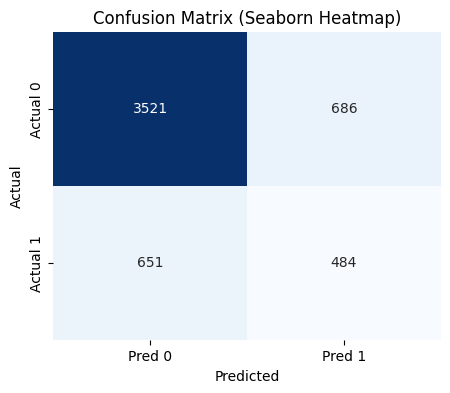

In [23]:
cm = confusion_matrix(y_test_h1n1, y_pred_tree_h1n1)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Seaborn Heatmap)")
plt.show()


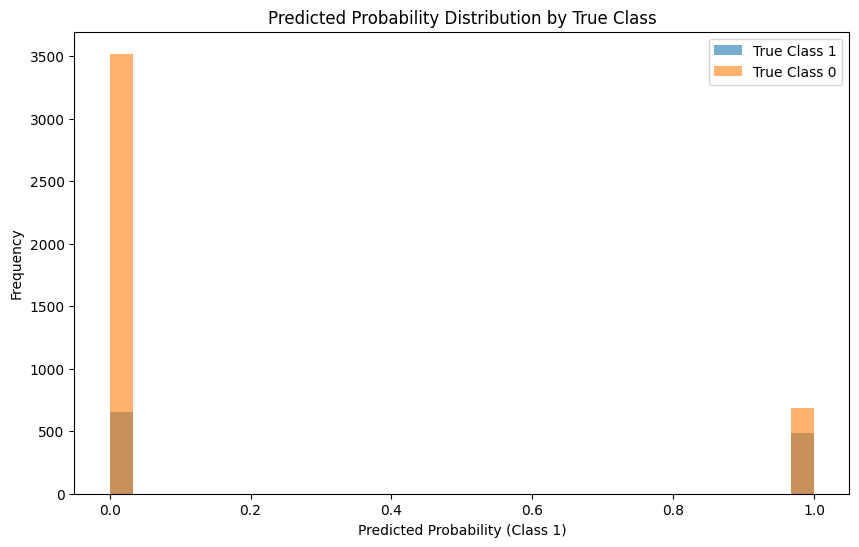

In [24]:
proba = tree_h1n1.predict_proba(X_test_h1n1)
y_true = y_test_h1n1

# Create DataFrame for easier plotting
df = pd.DataFrame({
    'prob_class_1': proba[:, 1],  # Probability of positive class
    'true_label': y_true
})

# Plot
plt.figure(figsize=(10, 6))
for class_label in df['true_label'].unique():
    subset = df[df['true_label'] == class_label]
    plt.hist(subset['prob_class_1'], bins=30, alpha=0.6, 
             label=f'True Class {class_label}')

plt.xlabel('Predicted Probability (Class 1)')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution by True Class')
plt.legend()
plt.show()

Baseline Decision Tree Interpretation - H1N1 Vaccine
Overall Performance

- Accuracy: 75% - Lower than Logistic Regression (84%), but more balanced approach
- More Honest Performance: Tree doesn't just predict majority class like logistic regression

Class-by-Class Breakdown
Class 0 (No Vaccine) - 4,207 cases:

- Precision: 84% - When predicting "no vaccine," correct 84% of time
- Recall: 83% - Catches 83% of actual non-vaccinated people
- F1-Score: 84% - Strong performance for majority class

Class 1 (Vaccinated) - 1,135 cases:

- Precision: 41% - When predicting "vaccinated," only correct 41% of time ⚠️
- Recall: 42% - Catches 42% of actual vaccinated people
- F1-Score: 41% - Poor but consistent performance

Key Observations

- Trade-off Strategy: Tree sacrificed overall accuracy to better balance class predictions
- Less Majority Bias: Recall dropped from 95% to 83% for Class 0 (less extreme bias)
- Same Minority Recall: Still only catches 42% of vaccinated people
- High False Positives: 59% of "vaccinated" predictions are wrong (low precision)

Comparison to Logistic Regression

- Lower Accuracy: 75% vs 84%
- More Balanced: Less extreme bias toward majority class
- Same Minority Issues: Still struggles with vaccinated class
- Better Foundation: More room for improvement with balancing techniques

What This Means
The decision tree is trying to be more fair between classes but lacks the features/data quality to accurately identify vaccinated individuals. It's making more attempts to predict vaccination but with high error rates.
Next Steps Priority

- Class balancing will likely help more with trees than logistic regression
- Feature engineering crucial for improving minority class precision
- Hyperparameter tuning (max_depth, min_samples_split) to reduce overfitting

The decision tree shows promise for improvement with proper preprocessing.RetryClaude can make mistakes. Please double-check responses.

In [25]:
# Decision Tree for Seasonal
tree_seasonal = DecisionTreeClassifier(random_state=42)
tree_seasonal.fit(X_train_seasonal, y_train_seasonal)
y_pred_tree_seasonal = tree_seasonal.predict(X_test_seasonal)

print("Baseline Decision Tree - Seasonal")
print(classification_report(y_test_seasonal, y_pred_tree_seasonal))

Baseline Decision Tree - Seasonal
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      2855
           1       0.65      0.65      0.65      2487

    accuracy                           0.68      5342
   macro avg       0.67      0.67      0.67      5342
weighted avg       0.68      0.68      0.68      5342



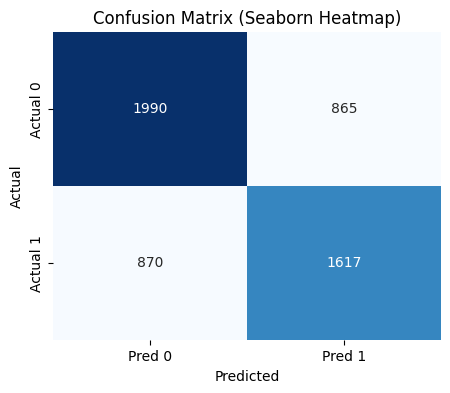

In [26]:
cm = confusion_matrix(y_test_seasonal, y_pred_tree_seasonal)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Seaborn Heatmap)")
plt.show()


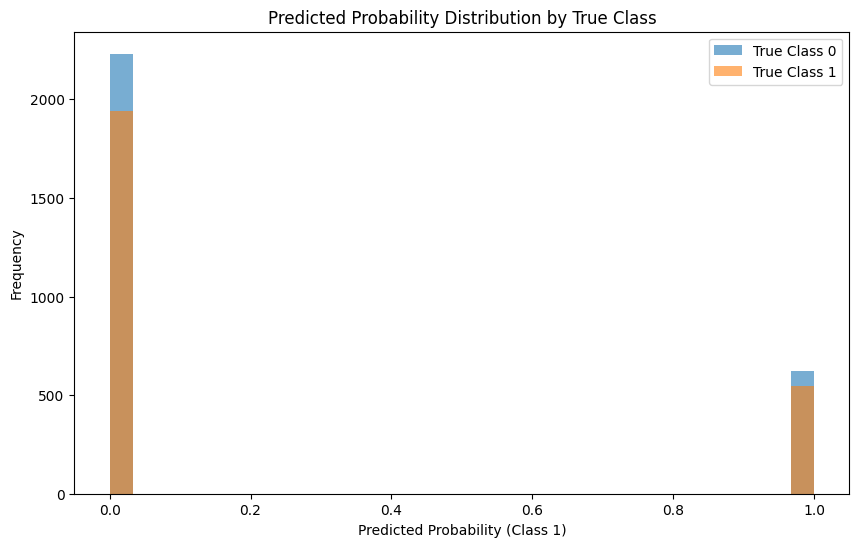

In [27]:
proba2 = tree_seasonal.predict_proba(X_test_seasonal)
y_true = y_test_seasonal

# Create DataFrame for easier plotting
df = pd.DataFrame({
    'prob_class_1': proba[:, 1],  # Probability of positive class
    'true_label': y_true
})

# Plot
plt.figure(figsize=(10, 6))
for class_label in df['true_label'].unique():
    subset = df[df['true_label'] == class_label]
    plt.hist(subset['prob_class_1'], bins=30, alpha=0.6, 
             label=f'True Class {class_label}')

plt.xlabel('Predicted Probability (Class 1)')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution by True Class')
plt.legend()
plt.show()

Baseline Decision Tree Interpretation - Seasonal Vaccine
Overall Performance

- Accuracy: 68% - Lower than Logistic Regression (78%), showing decision tree struggles more with this dataset
- Consistent Balance: All metrics (macro/weighted avg) align at 68%, indicating fair treatment of both classes

Class-by-Class Breakdown
Class 0 (No Vaccine) - 2,855 cases:

- Precision: 70% - When predicting "no vaccine," correct 70% of time
- Recall: 71% - Catches 71% of actual non-vaccinated people
- F1-Score: 70% - Moderate performance

Class 1 (Vaccinated) - 2,487 cases:

- Precision: 66% - When predicting "vaccinated," correct 66% of time
- Recall: 64% - Catches 64% of actual vaccinated people
- F1-Score: 65% - Slightly weaker but similar performance

Key Observations

- Well-Balanced Approach: Only 6% difference between class performances
- Consistent Weakness: Both classes show moderate performance (no severe bias)
- Lower Overall Performance: Significant drop from logistic regression baseline

Comparison to Logistic Regression

- 10% Accuracy Drop: 68% vs 78% - substantial performance loss
- More Balanced: Smaller gap between class performances
- Lower Quality Predictions: Both classes perform worse than logistic regression

Comparison to H1N1 Tree

- Better Balance: No extreme class imbalance effects
- Lower Complexity: Seasonal vaccine may have simpler decision patterns
- More Consistent: Less variation between precision/recall within classes

What This Means
The decision tree is struggling to find clear patterns in the seasonal vaccine data. The balanced class distribution means it's not biased, but it's also not finding strong predictive signals.
Next Steps Priority

- Feature engineering is critical - tree needs better signal
- Hyperparameter tuning to optimize tree complexity
- Consider ensemble methods (Random Forest) to improve performance
- Logistic Regression may be better suited for this particular dataset

The decision tree shows that seasonal vaccine behavior may require more sophisticated feature engineering or different modeling approaches.RetryClaude can make mistakes. Please double-check responses.

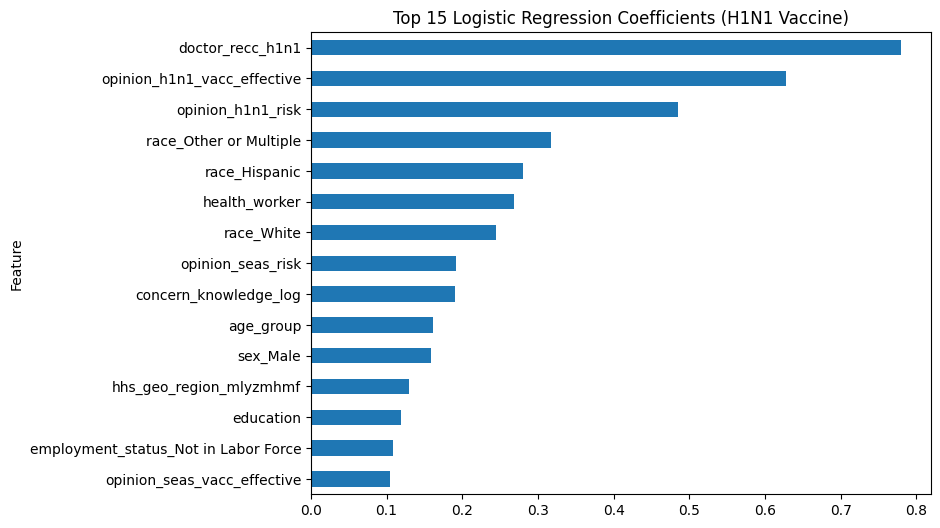

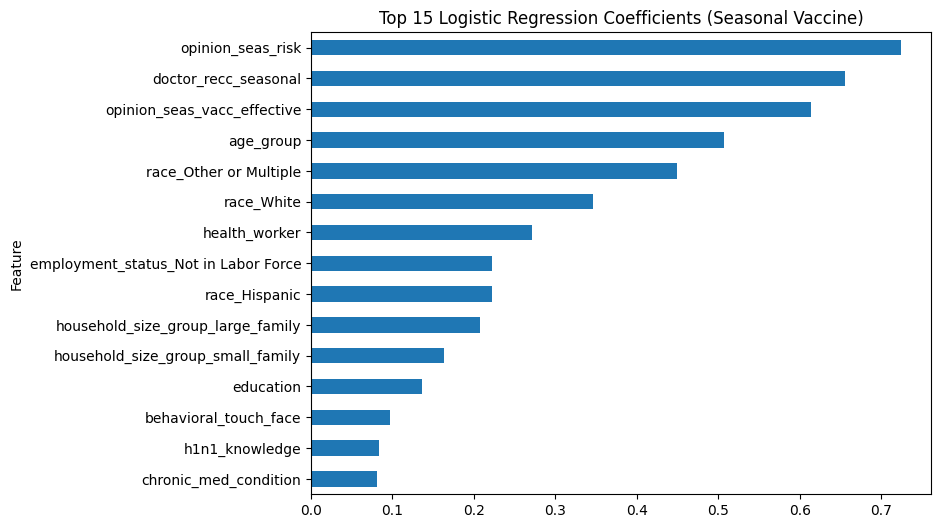

In [28]:
def plot_logistic_importance(model, X, target_name):
    importance = model.coef_[0]
    feature_importance = pd.DataFrame({
        "Feature": X.columns,
        "Importance": importance
    }).sort_values(by="Importance", ascending=False)
    
    # Plot top 15 features
    plt.figure(figsize=(8,6))
    feature_importance.head(15).plot(
        kind="barh", x="Feature", y="Importance", legend=False, ax=plt.gca()
    )
    plt.title(f"Top 15 Logistic Regression Coefficients ({target_name})")
    plt.gca().invert_yaxis()
    plt.show()
    
    return feature_importance

# H1N1
log_h1n1_importance = plot_logistic_importance(log_h1n1, X, "H1N1 Vaccine")

# Seasonal
log_seasonal_importance = plot_logistic_importance(log_seasonal, X, "Seasonal Vaccine")

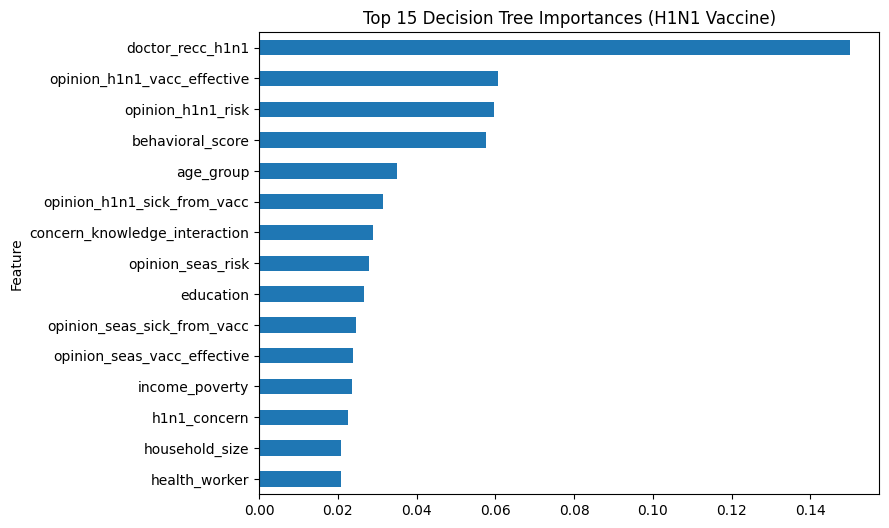

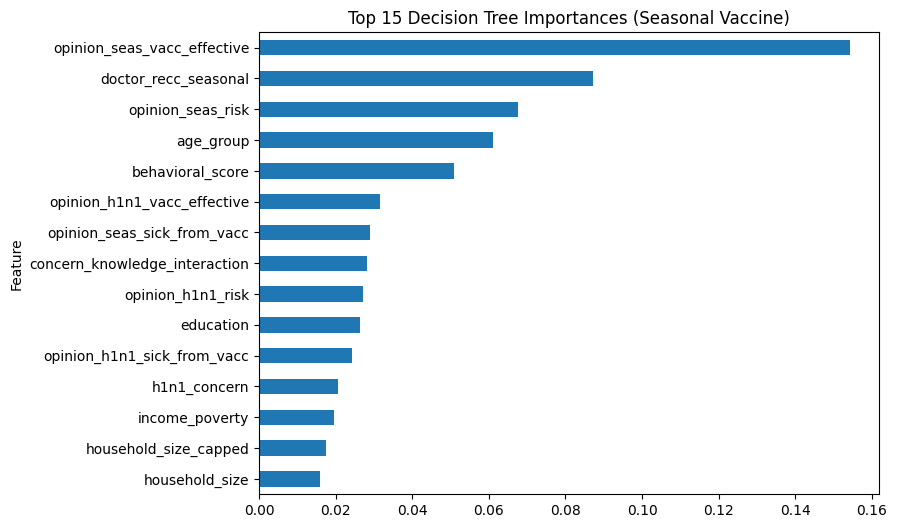

In [29]:

# Decision Tree Importance

def plot_tree_importance(model, X, target_name):
    importance_tree = model.feature_importances_
    feature_importance_tree = pd.DataFrame({
        "Feature": X.columns,
        "Importance": importance_tree
    }).sort_values(by="Importance", ascending=False)
    
    # Plot top 15 features
    plt.figure(figsize=(8,6))
    feature_importance_tree.head(15).plot(
        kind="barh", x="Feature", y="Importance", legend=False, ax=plt.gca()
    )
    plt.title(f"Top 15 Decision Tree Importances ({target_name})")
    plt.gca().invert_yaxis()
    plt.show()
    
    return feature_importance_tree

# H1N1
tree_h1n1_importance = plot_tree_importance(tree_h1n1, X, "H1N1 Vaccine")

# Seasonal
tree_seasonal_importance = plot_tree_importance(tree_seasonal, X, "Seasonal Vaccine")

In [30]:
# Random Forest (ensemble of Decision Trees, reduces overfitting)

# H1N1

rf_h1n1 = RandomForestClassifier(n_estimators=200, random_state=42)
rf_h1n1.fit(X_train_h1n1, y_train_h1n1)  
rf_pred_h1n1 = rf_h1n1.predict(X_test_h1n1)

print("H1N1 Random Forest Performance:")
print(classification_report(y_test_h1n1, rf_pred_h1n1))

H1N1 Random Forest Performance:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4207
           1       0.69      0.39      0.50      1135

    accuracy                           0.83      5342
   macro avg       0.77      0.67      0.70      5342
weighted avg       0.82      0.83      0.82      5342



In [31]:
print(f"Accuracy: {rf_h1n1.score(X_test_h1n1, y_test_h1n1)*100:.2f}%")

Accuracy: 83.41%


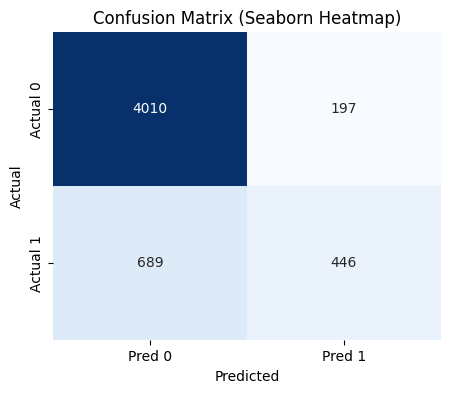

In [32]:
cm = confusion_matrix(y_test_h1n1, rf_pred_h1n1)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Seaborn Heatmap)")
plt.show()

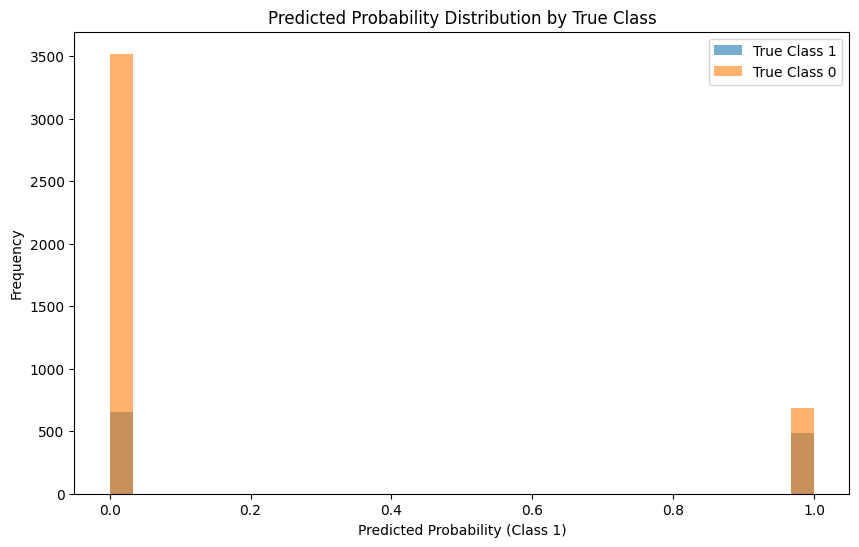

In [33]:
proba2 = rf_h1n1.predict_proba(X_test_seasonal)
y_true = y_test_h1n1

# Create DataFrame for easier plotting
df = pd.DataFrame({
    'prob_class_1': proba[:, 1],  # Probability of positive class
    'true_label': y_true
})

# Plot
plt.figure(figsize=(10, 6))
for class_label in df['true_label'].unique():
    subset = df[df['true_label'] == class_label]
    plt.hist(subset['prob_class_1'], bins=30, alpha=0.6, 
             label=f'True Class {class_label}')

plt.xlabel('Predicted Probability (Class 1)')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution by True Class')
plt.legend()
plt.show()

In [34]:

rf1_seasonal = RandomForestClassifier(n_estimators=200, random_state=42)
rf1_seasonal.fit(X_train_seasonal, y_train_seasonal)
rf_pred_seasonal = rf1_seasonal.predict(X_test_seasonal)

# Now check both
manual_acc = accuracy_score(y_test_seasonal, rf_pred_seasonal)
model_acc = rf1_seasonal.score(X_test_seasonal, y_test_seasonal)

print(f"Manual: {manual_acc*100:.2f}%")
print(f"Model: {model_acc*100:.2f}%")
print(f"Match: {abs(manual_acc - model_acc) < 0.001}")

Manual: 77.82%
Model: 77.82%
Match: True


In [35]:
print(classification_report(y_test_seasonal, rf_pred_seasonal))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      2855
           1       0.77      0.74      0.76      2487

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



Text(0.5, 1.0, 'Confusion Matrix (Seaborn Heatmap)')

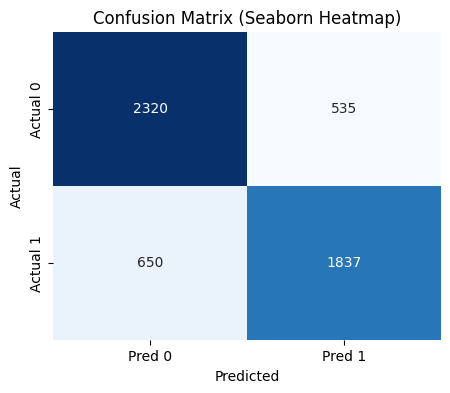

In [36]:
cm = confusion_matrix(y_test_seasonal, rf_pred_seasonal)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Seaborn Heatmap)")

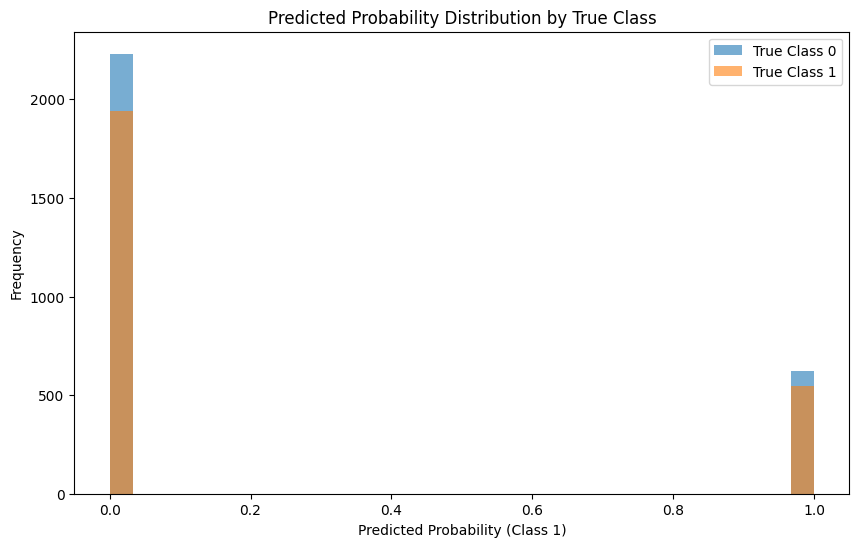

In [37]:
proba2 = rf1_seasonal.predict_proba(X_test_seasonal)
y_true = y_test_seasonal

# Create DataFrame for easier plotting
df = pd.DataFrame({
    'prob_class_1': proba[:, 1],  # Probability of positive class
    'true_label': y_true
})

# Plot
plt.figure(figsize=(10, 6))
for class_label in df['true_label'].unique():
    subset = df[df['true_label'] == class_label]
    plt.hist(subset['prob_class_1'], bins=30, alpha=0.6, 
             label=f'True Class {class_label}')

plt.xlabel('Predicted Probability (Class 1)')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution by True Class')
plt.legend()
plt.show()

In [38]:
# XGBoost (gradient boosted trees, usually strong performance)

# H1N1
xgb_h1n1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_h1n1.fit(X_train_h1n1, y_train_h1n1)
xgb_pred_h1n1 = xgb_h1n1.predict(X_test_h1n1)

print("H1N1 XGBoost Performance:")
print(classification_report(y_test_h1n1, xgb_pred_h1n1))


H1N1 XGBoost Performance:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      4207
           1       0.64      0.45      0.53      1135

    accuracy                           0.83      5342
   macro avg       0.75      0.69      0.71      5342
weighted avg       0.82      0.83      0.82      5342



Text(0.5, 1.0, 'Confusion Matrix (Seaborn Heatmap)')

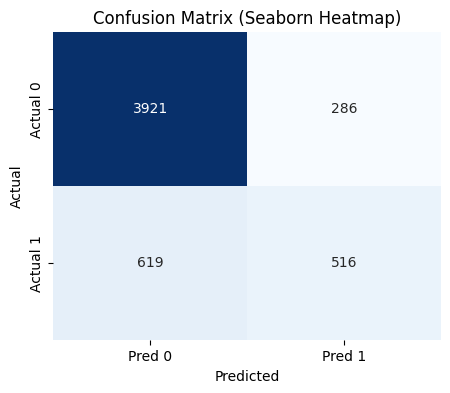

In [39]:
cm = confusion_matrix(y_test_h1n1, xgb_pred_h1n1)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Seaborn Heatmap)")

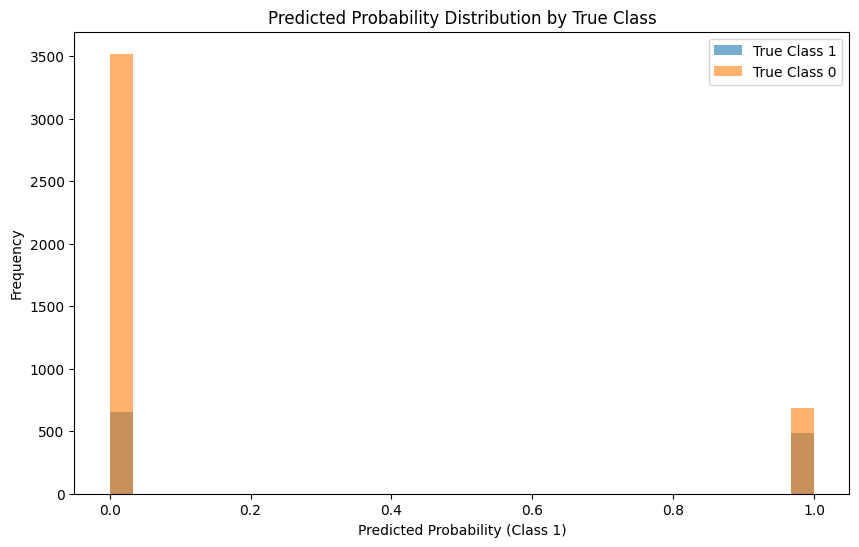

In [40]:
proba2 = xgb_h1n1.predict_proba(X_test_h1n1)
y_true = y_test_h1n1

# Create DataFrame for easier plotting
df = pd.DataFrame({
    'prob_class_1': proba[:, 1],  # Probability of positive class
    'true_label': y_true
})

# Plot
plt.figure(figsize=(10, 6))
for class_label in df['true_label'].unique():
    subset = df[df['true_label'] == class_label]
    plt.hist(subset['prob_class_1'], bins=30, alpha=0.6, 
             label=f'True Class {class_label}')

plt.xlabel('Predicted Probability (Class 1)')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution by True Class')
plt.legend()
plt.show()

In [41]:
print(f"Accuracy: {xgb_h1n1.score(X_test_h1n1, y_test_h1n1)*100:.2f}%")

Accuracy: 83.06%


In [42]:
# Seasonal
xgb_seasonal = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_seasonal.fit(X_train_seasonal, y_train_seasonal)
xgb_pred_seasonal = xgb_seasonal.predict(X_test_seasonal)

print("Seasonal XGBoost Performance:")
print(classification_report(y_test_seasonal, xgb_pred_seasonal))

Seasonal XGBoost Performance:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      2855
           1       0.77      0.75      0.76      2487

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



In [43]:
print(f"Accuracy: {xgb_seasonal.score(X_test_seasonal, y_test_seasonal)*100:.2f}%")

Accuracy: 77.89%


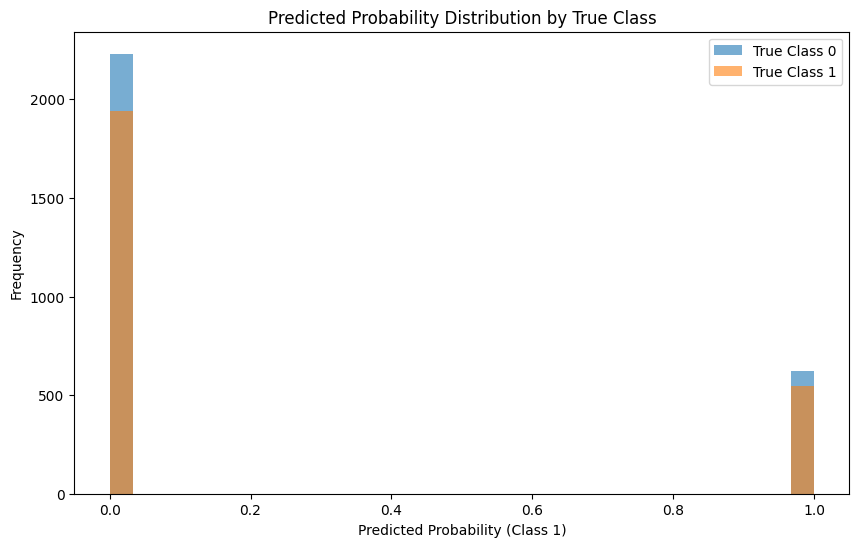

In [44]:
proba2 = xgb_seasonal.predict_proba(X_test_seasonal)
y_true = y_test_seasonal

# Create DataFrame for easier plotting
df = pd.DataFrame({
    'prob_class_1': proba[:, 1],  # Probability of positive class
    'true_label': y_true
})

# Plot
plt.figure(figsize=(10, 6))
for class_label in df['true_label'].unique():
    subset = df[df['true_label'] == class_label]
    plt.hist(subset['prob_class_1'], bins=30, alpha=0.6, 
             label=f'True Class {class_label}')

plt.xlabel('Predicted Probability (Class 1)')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution by True Class')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Confusion Matrix (Seaborn Heatmap)')

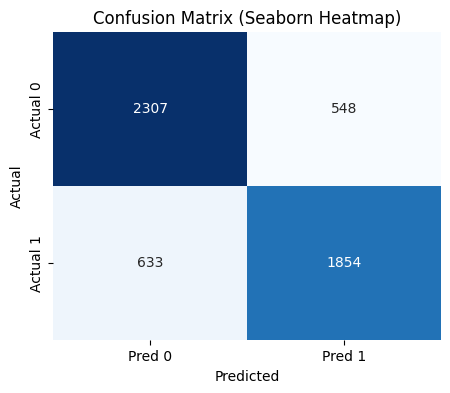

In [45]:
cm = confusion_matrix(y_test_seasonal, xgb_pred_seasonal)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Seaborn Heatmap)")

H1N1 Vaccine Feature Importances:
                                  Feature  Importance
9                       doctor_recc_h1n1    0.091332
15                     opinion_h1n1_risk    0.070995
14           opinion_h1n1_vacc_effective    0.059199
44                      behavioral_score    0.045938
18                     opinion_seas_risk    0.041167
20                             age_group    0.034812
16           opinion_h1n1_sick_from_vacc    0.031420
17           opinion_seas_vacc_effective    0.028732
45         concern_knowledge_interaction    0.028584
19           opinion_seas_sick_from_vacc    0.028157
21                             education    0.028035
48                 household_size_capped    0.027655
47                        household_size    0.026893
10                  doctor_recc_seasonal    0.022364
0                           h1n1_concern    0.022308
13                         health_worker    0.020842
22                        income_poverty    0.019548
46         

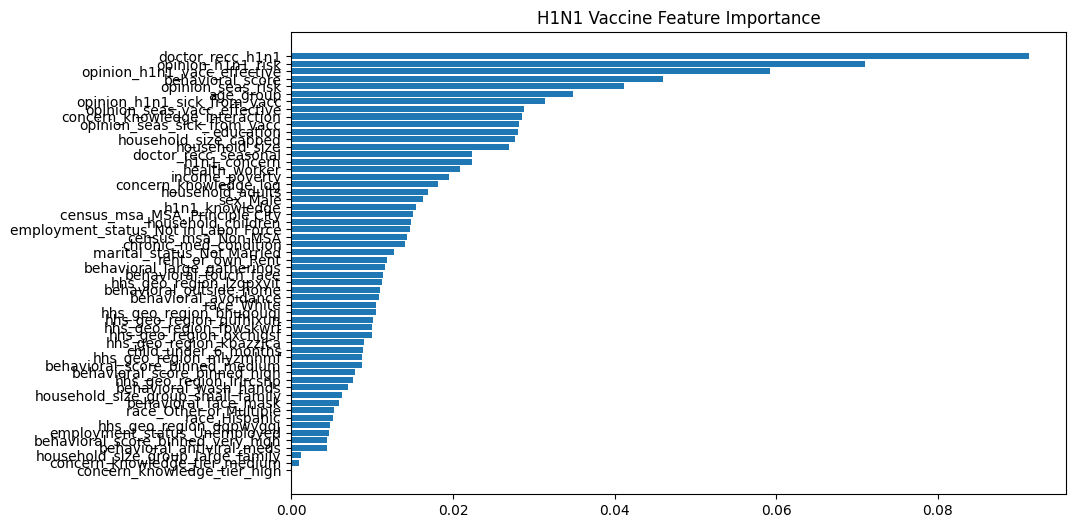


 Seasonal Vaccine Feature Importances:
                                  Feature  Importance
18                     opinion_seas_risk    0.091493
17           opinion_seas_vacc_effective    0.087671
10                  doctor_recc_seasonal    0.065037
20                             age_group    0.059192
44                      behavioral_score    0.043103
15                     opinion_h1n1_risk    0.035268
14           opinion_h1n1_vacc_effective    0.032763
45         concern_knowledge_interaction    0.029464
19           opinion_seas_sick_from_vacc    0.029059
21                             education    0.028872
16           opinion_h1n1_sick_from_vacc    0.026868
48                 household_size_capped    0.023960
47                        household_size    0.023896
0                           h1n1_concern    0.021537
22                        income_poverty    0.019576
46                 concern_knowledge_log    0.018668
1                         h1n1_knowledge    0.016821
9    

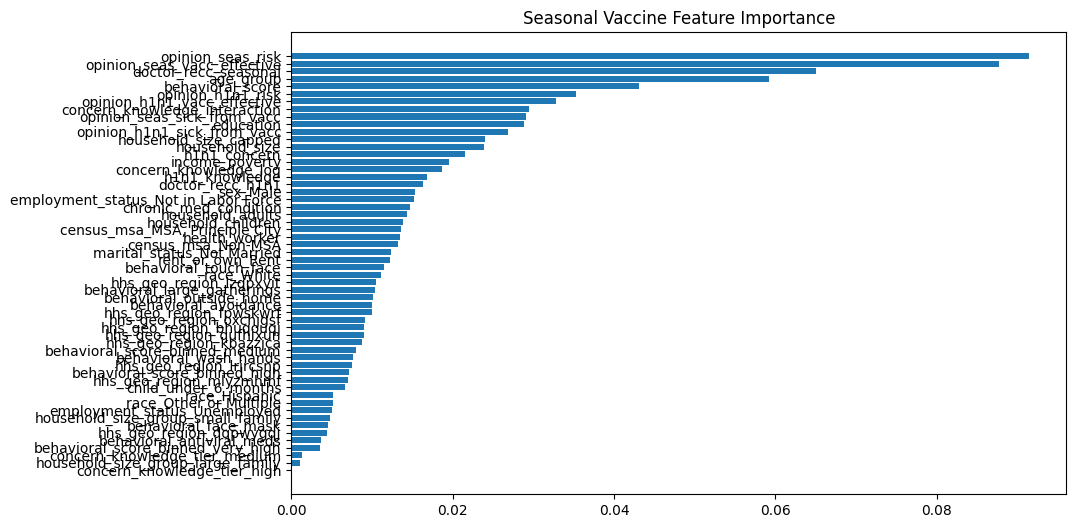

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# H1N1 Feature Importances
# -------------------------------
feat_importances_h1n1 = pd.DataFrame({
    'Feature': X_train_h1n1.columns,
    'Importance': rf_h1n1.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("H1N1 Vaccine Feature Importances:\n", feat_importances_h1n1)

# Optional: bar plot
plt.figure(figsize=(10,6))
plt.barh(feat_importances_h1n1['Feature'], feat_importances_h1n1['Importance'])
plt.gca().invert_yaxis()
plt.title('H1N1 Vaccine Feature Importance')
plt.show()

# -------------------------------
# Seasonal Feature Importances
# -------------------------------
feat_importances_seasonal = pd.DataFrame({
    'Feature': X_train_seasonal.columns,
    'Importance': rf1_seasonal.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n Seasonal Vaccine Feature Importances:\n", feat_importances_seasonal)

# Optional: bar plot
plt.figure(figsize=(10,6))
plt.barh(feat_importances_seasonal['Feature'], feat_importances_seasonal['Importance'])
plt.gca().invert_yaxis()
plt.title('Seasonal Vaccine Feature Importance')
plt.show()


In [47]:
# handling class imbalance 
# H1N1
smote_h1n1 = SMOTE(random_state=42)
X_train_h1n1_res, y_train_h1n1_res = smote_h1n1.fit_resample(X_train_h1n1, y_train_h1n1)


In [48]:
smote_seasonal = SMOTE(random_state=42)
X_train_seasonal_res, y_train_seasonal_res = smote_seasonal.fit_resample(X_train_seasonal, y_train_seasonal)

Hyperparameter tuning

In [49]:
# Parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced']  # handles class imbalance
}

In [50]:
# Define F1 scorer for imbalanced classes
f1_scorer = make_scorer(f1_score)

# randomizedsearch for h1n1
rf_h1n1 = RandomForestClassifier(random_state=42)
rf_h1n1_cv = RandomizedSearchCV(
    rf_h1n1, param_distributions=param_grid,
    n_iter=20, scoring=f1_scorer, cv=5, verbose=2, n_jobs=1, random_state=42
)
rf_h1n1_cv.fit(X_train_h1n1_res, y_train_h1n1_res)
print("H1N1 Best Params:", rf_h1n1_cv.best_params_)

In [52]:

# RandomizedSearchCV for Seasonal

rf_seasonal = RandomForestClassifier(random_state=42)
rf_seasonal_cv = RandomizedSearchCV(
    rf_seasonal, param_distributions=param_grid,
    n_iter=20, scoring=f1_scorer, cv=5, verbose=2, n_jobs=1, random_state=42
)
rf_seasonal_cv.fit(X_train_seasonal_res, y_train_seasonal_res)
print("Seasonal Best Params:", rf_seasonal_cv.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.7s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.7s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.6s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_sample

In [53]:
# Train  models with best parameters
# h1n1 random forest model

rf_h1n1_final = RandomForestClassifier(**rf_h1n1_cv.best_params_, random_state=42)
rf_h1n1_final.fit(X_train_h1n1_res, y_train_h1n1_res)

,n_estimators,200
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
# evaluate on testset
y_pred_h1n1 = rf_h1n1_final.predict(X_test_h1n1)
y_pred_h1n1

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [55]:
print("\n H1N1 Vaccine Classification Report:\n", classification_report(y_test_h1n1, y_pred_h1n1))


 H1N1 Vaccine Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4207
           1       0.65      0.47      0.54      1135

    accuracy                           0.83      5342
   macro avg       0.76      0.70      0.72      5342
weighted avg       0.82      0.83      0.82      5342



In [56]:
rf_seasonal_final = RandomForestClassifier(**rf_seasonal_cv.best_params_, random_state=42)
rf_seasonal_final.fit(X_train_seasonal_res, y_train_seasonal_res)


,n_estimators,500
,criterion,'gini'
,max_depth,30
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
y_pred_seasonal = rf_seasonal_final.predict(X_test_seasonal)
y_pred_seasonal

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [58]:
print("\n Seasonal Vaccine Classification Report:\n", classification_report(y_test_seasonal, y_pred_seasonal))


 Seasonal Vaccine Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      2855
           1       0.78      0.74      0.76      2487

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



In [59]:
 #  top 15 features for H1N1
top_features = [
    'doctor_recc_h1n1',
    'opinion_h1n1_risk',
    'opinion_h1n1_vacc_effective',
    'behavioral_score',
    'opinion_seas_risk',
    'age_group',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'concern_knowledge_interaction',
    'opinion_seas_sick_from_vacc',
    'education',
    'household_size_capped',
    
    'household_size',
    'doctor_recc_seasonal',
    'h1n1_concern'
]

# Create training and test sets with only top features
X_train_top = X_train_h1n1[top_features]
X_test_top = X_test_h1n1[top_features]


In [66]:
print(X_train_res.shape, y_train_res.shape)
print(X_test_top.shape, y_test_h1n1.shape)

(33652, 15) (33652,)
(5342, 15) (5342,)


In [69]:

pd.Series(y_train_h1n1).value_counts(normalize=True)


h1n1_vaccine
0    0.78755
1    0.21245
Name: proportion, dtype: float64

In [72]:

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_top, y_train_h1n1)

# Verify new class balance
print(pd.Series(y_train_res).value_counts(normalize=True))


h1n1_vaccine
0    0.5
1    0.5
Name: proportion, dtype: float64


In [75]:

# Create polynomial features of degree 2
# test set stays the same
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train_res)
X_test_poly = poly.transform(X_test_top)  


In [76]:
rf_h1n1 = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
rf_h1n1.fit(X_train_poly, y_train_res)

,n_estimators,300
,criterion,'gini'
,max_depth,15
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
# evaluating the model
y_pred = rf_h1n1.predict(X_test_poly)
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [78]:
print("H1N1 Vaccine Classification Report:\n")
print(classification_report(y_test_h1n1, y_pred))

H1N1 Vaccine Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4207
           1       0.61      0.51      0.56      1135

    accuracy                           0.83      5342
   macro avg       0.74      0.71      0.72      5342
weighted avg       0.82      0.83      0.82      5342



NameError: name 'importances' is not defined

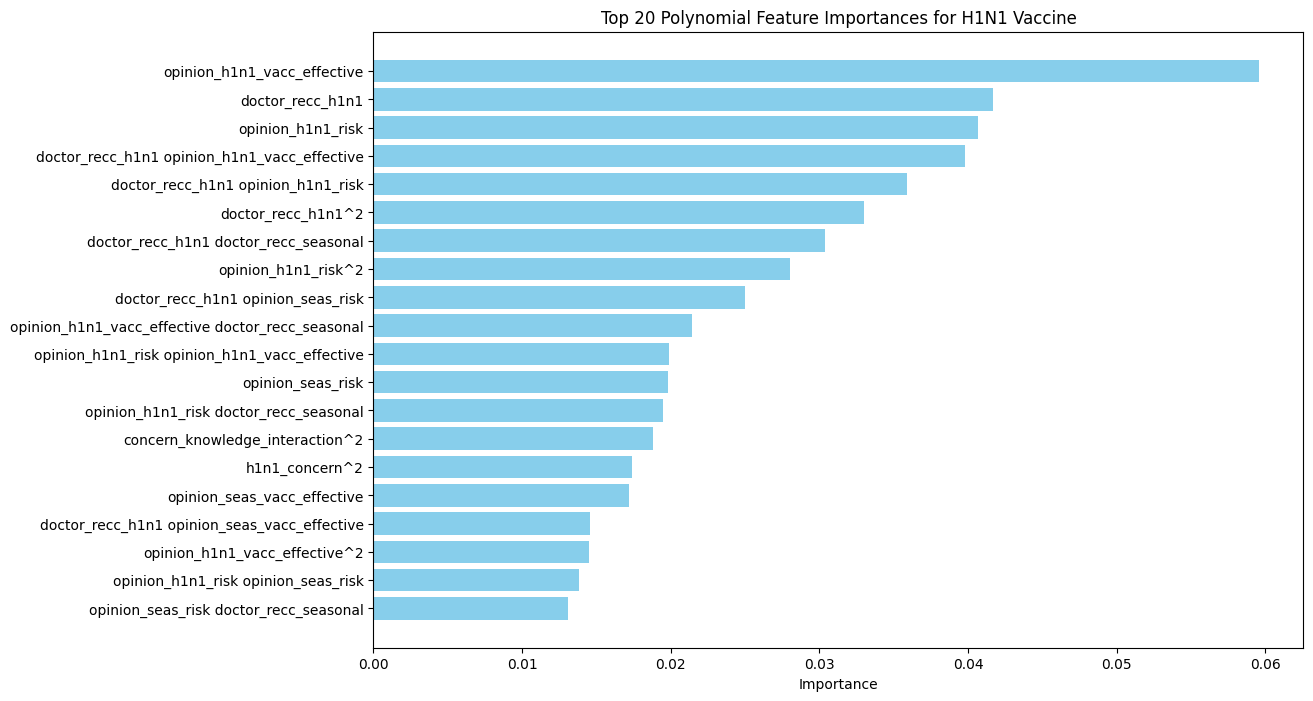

In [80]:
poly_feature_names = poly.get_feature_names_out(top_features)
importances = rf_h1n1.feature_importances_

feat_importances = pd.DataFrame({
    'Feature': poly_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 20
plt.figure(figsize=(12,8))
plt.barh(feat_importances['Feature'][:20][::-1], feat_importances['Importance'][:20][::-1], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Polynomial Feature Importances for H1N1 Vaccine')
plt.show()


In [81]:
pd.Series(y_seasonal).value_counts(normalize=True)


seasonal_vaccine
0    0.534392
1    0.465608
Name: proportion, dtype: float64

In [83]:
# introducing polymonial features to seasonal vacinne 
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_seasonal_poly = poly.fit_transform(X_train_seasonal)
X_test_seasonal_poly = poly.transform(X_test_seasonal)


In [84]:
# Train Random Forest on seasonal vaccine 
rf_seasonal = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',  # optional, can help slightly
    random_state=42
)
rf_seasonal.fit(X_train_seasonal_poly, y_train_seasonal)

,n_estimators,300
,criterion,'gini'
,max_depth,15
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [85]:
# Predicting  & Evaluating
y_pred_seasonal = rf_seasonal.predict(X_test_seasonal_poly)
print("Seasonal Vaccine Classification Report:\n")
print(classification_report(y_test_seasonal, y_pred_seasonal))

Seasonal Vaccine Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      2855
           1       0.77      0.75      0.76      2487

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



In [87]:
xgb_h1n1 = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train on SMOTE + polynomial features
xgb_h1n1.fit(X_train_poly, y_train_res)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [88]:
y_pred = xgb_h1n1.predict(X_test_poly)

In [89]:
print(classification_report(y_test_h1n1, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4207
           1       0.63      0.44      0.52      1135

    accuracy                           0.83      5342
   macro avg       0.75      0.69      0.71      5342
weighted avg       0.81      0.83      0.81      5342



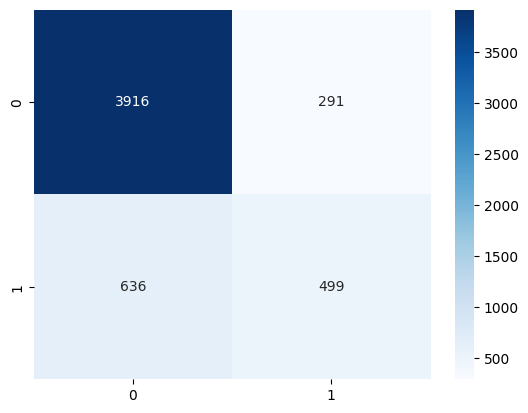

In [90]:


cm = confusion_matrix(y_test_h1n1, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [91]:
# XGBoost classifier
xgb_seasonal = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train model
xgb_seasonal.fit(X_train_seasonal_poly, y_train_seasonal)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [92]:
# Predict
y_pred_seasonal = xgb_seasonal.predict(X_test_seasonal_poly)

In [93]:
# Evaluation
print("Seasonal Vaccine Classification Report:\n")
print(classification_report(y_test_seasonal, y_pred_seasonal))

Seasonal Vaccine Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      2855
           1       0.77      0.73      0.75      2487

    accuracy                           0.78      5342
   macro avg       0.78      0.77      0.77      5342
weighted avg       0.78      0.78      0.78      5342



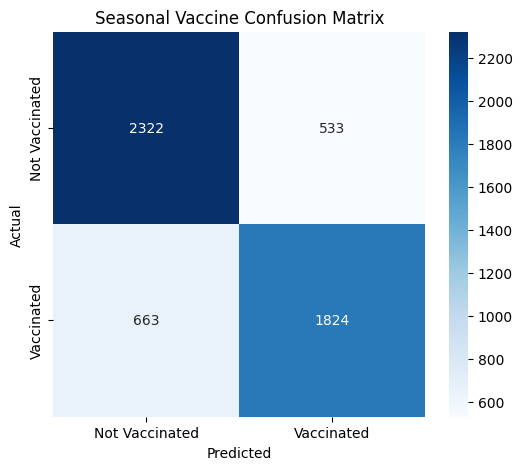

In [94]:
cm = confusion_matrix(y_test_seasonal, y_pred_seasonal)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Vaccinated','Vaccinated'], 
            yticklabels=['Not Vaccinated','Vaccinated'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Seasonal Vaccine Confusion Matrix')
plt.show()

# Vaccine Prediction Notebook Summary

##  Problem
Predict **H1N1** and **Seasonal vaccine uptake** using survey features.

##  Data Preparation
- Train-test split (80-20) with stratification
- SMOTE applied for H1N1 to balance classes
- Polynomial features (degree 2) for interactions
- Top features selected based on importance

##  Modeling
- **Baseline (Dummy)**: H1N1 78%, Seasonal 53%
- **Logistic Regression**: H1N1 83%, Seasonal 78%
- **Random Forest**: H1N1 83% (minority class F1 ~0.56), Seasonal 78%
- **XGBoost**: Similar performance; slightly improved H1N1 predictions
- **Optional Ensemble**: Combines RF + XGB, can improve minority class recall

## Evaluation
- Metrics: Accuracy, Precision, Recall, F1-score
- H1N1: Minority class harder to predict; SMOTE + polynomial features help
- Seasonal: Balanced classes, good F1 for both classes

## Key Takeaways
- Iterative modeling improved results step by step
- Most important features: doctor recommendation, risk perception, behavioral score
- Ensemble or tuning can further improve minority class pre. Key Features
## H1N1 Vaccine: 
- `doctor_recc_h1n1`, `opinion_h1n1_risk`, `opinion_h1n1_vacc_effective`, `behavioral_score`, `opinion_seas_risk`

## Seasonal Vaccine:  
- `opinion_seas_risk`, `opinion_seas_vacc_effective`, `doctor_recc_seasonal`, `age_group`, `behavioral_score`